In [8]:
#%pip install seaborn pandas matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Загрузка данных
data = pd.read_csv('costa_rica_deceases.csv')

# Проверка первых строк датасета
data.head()

C:\Users\artem\AppData\Local\Temp\ipykernel_15192\4013109611.py:2: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('costa_rica_deceases.csv')


,anotrab,mestrab,nacionalid,sexo,estcivil,edads,edadsrec,provincia,pc,IU,...,nacmadre,provregis,pcregis,diadeclara,mesdeclara,anodeclara,grgruposcb,gruposcb,reginec,regsalud
0,2014,Enero,Costa Rica,Mujeres,Menor,0,Menor de 1 año,San José,San José,1,...,Costa Rica,San José,San José,5,Enero,2014,15,49 - Ciertas afecciones originadas en el perío...,Región Central,Región Central Sur
1,2014,Enero,Costa Rica,Hombres,Menor,0,Menor de 1 año,San José,San José,1,...,gnorado,San José,San José,7,Enero,2014,14,"48 - Malformaciones congénitas, deformidades y...",Región Central,Región Central Sur
2,2014,Enero,Costa Rica,Hombres,Menor,0,Menor de 1 año,San José,Santa Ana,1,...,Costa Rica,San José,San José,8,Enero,2014,14,"48 - Malformaciones congénitas, deformidades y...",Región Central,Región Central Sur
3,2014,Enero,Costa Rica,Hombres,Menor,0,Menor de 1 año,San José,Goicoechea,4,...,Costa Rica,San José,San José,15,Enero,2014,15,49 - Ciertas afecciones originadas en el perío...,Región Central,Región Central Sur
4,2014,Enero,Costa Rica,Mujeres,Menor,0,Menor de 1 año,Alajuela,San Ramón,1,...,gnorado,San José,San José,13,Enero,2014,14,"48 - Malformaciones congénitas, deformidades y...",Región Central,Región Central Occidente


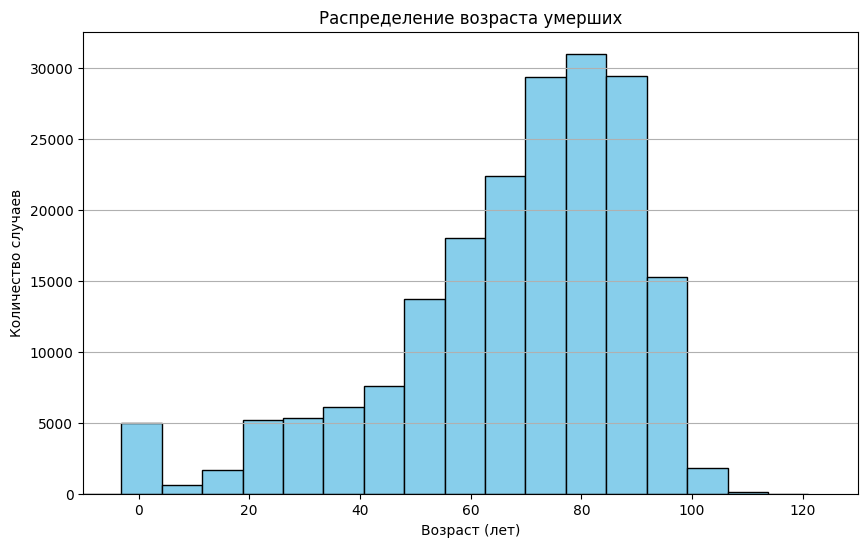


Гистограмма показывает, что большинство случаев смерти происходит в возрасте 80 лет, 
что может указывать на старение населения и увеличение заболеваний, связанных с возрастом.

Но так же можно заметить очень печальную статистику по высокой сметрности среди младенцев...



In [10]:
plt.figure(figsize=(10, 6))
plt.hist(data['edads'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение возраста умерших')
plt.xlabel('Возраст (лет)')
plt.ylabel('Количество случаев')
plt.grid(axis='y')
plt.xlim(-10, 130)
plt.show()

print("\nГистограмма показывает, что большинство случаев смерти происходит в возрасте 80 лет, \nчто может указывать на старение населения и увеличение заболеваний, связанных с возрастом.\n")
print("Но так же можно заметить очень печальную статистику по высокой сметрности среди младенцев...\n")

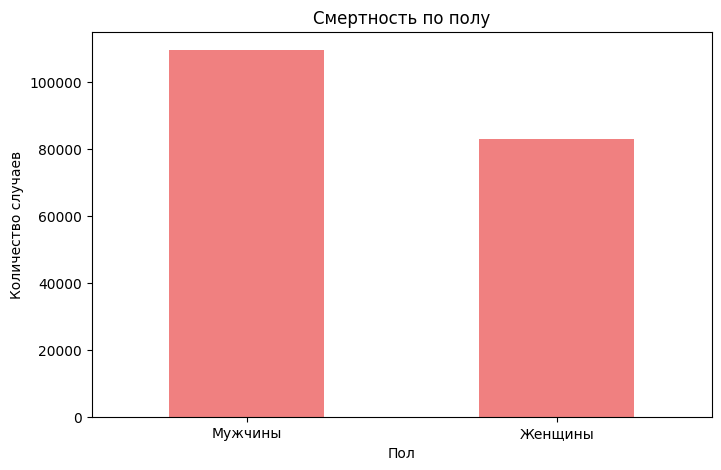


На графике видно, что среди умерших больше мужчин, чем женщин, 
что может говорить о более высоком уровне риска для мужчин в определенных возрастных группах



In [11]:
sexo_translation = {
    "Hombres": "Мужчины",
    "Mujeres": "Женщины"
}

plt.figure(figsize=(8, 5))
data['sexo'].value_counts().rename(sexo_translation).plot(kind='bar', color='lightcoral')
plt.title('Смертность по полу')
plt.xlabel('Пол')
plt.ylabel('Количество случаев')
plt.xticks(rotation=0)
plt.show()

print("\nНа графике видно, что среди умерших больше мужчин, чем женщин, \nчто может говорить о более высоком уровне риска для мужчин в определенных возрастных группах\n")

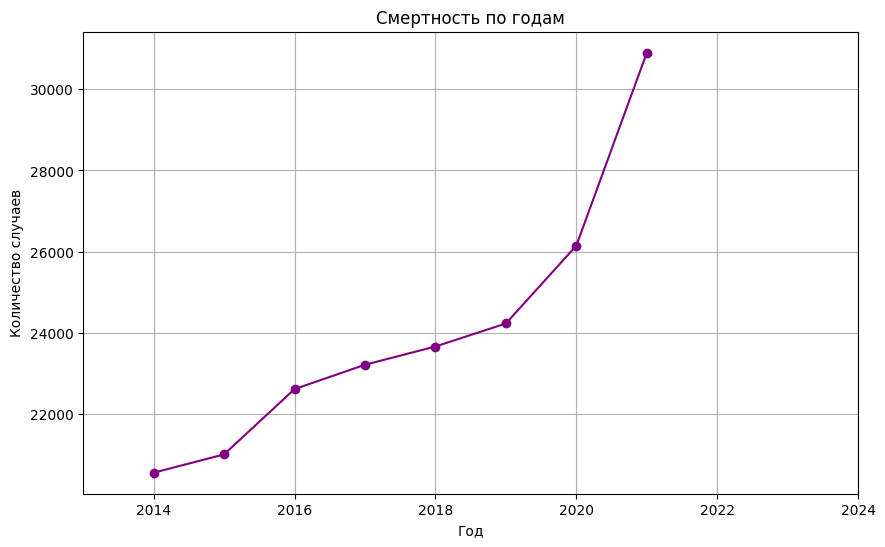


График показывает изменения в количестве смертей по годам. 
Можно заметить рост числа погибших с каждым годом

Особенно сильно заметен пик во время пандемии COVID-19



In [12]:
plt.figure(figsize=(10, 6))
data[data['anodef'] >= 2014]['anodef'].value_counts().sort_index().plot(kind='line', marker='o', color='purple')
plt.title('Смертность по годам')
plt.xlabel('Год')
plt.ylabel('Количество случаев')
plt.grid()
plt.xlim(2013, 2024)
plt.show()

print("\nГрафик показывает изменения в количестве смертей по годам. \nМожно заметить рост числа погибших с каждым годом\n")
print("Особенно сильно заметен пик во время пандемии COVID-19\n")

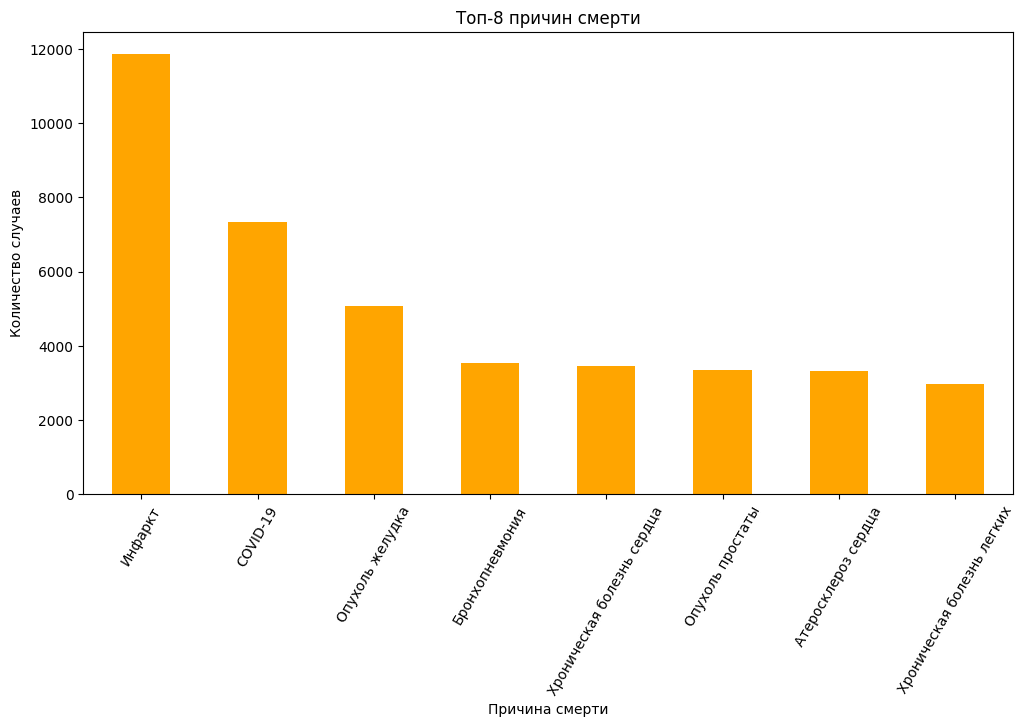


На графике представлены наиболее распространенные причины смерти.
Это может помочь в выявлении приоритетов для здравоохранения

Главными причинами смертей стали проблемы с сердцем и пандемия Короновируса



In [13]:
causes_translation = {
    "I219 - Infarto agudo del miocardio, sin otra especificación": "Инфаркт",
    "U071 - COVID-19 virus identificado": "COVID-19",
    "C169 - Tumor maligno del estómago, parte no especificada": "Опухоль желудка",
    "J180 - Bronconeumonía, no especificada": "Бронхопневмония",
    "I259 - Enfermedad isquémica crónica del corazón, no especificada": "Хроническая болезнь сердца",
    "C610 - Tumor maligno de la próstata": "Опухоль простаты",
    "I251 - Enfermedad aterosclerótica del corazón": "Атеросклероз сердца",
    "J449 - Enfermedad pulmonar obstructiva crónica, no especificada": "Хроническая болезнь легких"
}

top_causes = data['des_causa'].value_counts().head(8).rename(causes_translation)

plt.figure(figsize=(12, 6))
top_causes.plot(kind='bar', color='orange')
plt.title('Топ-8 причин смерти')
plt.xlabel('Причина смерти')
plt.ylabel('Количество случаев')
plt.xticks(rotation=60)
plt.show()

print("\nНа графике представлены наиболее распространенные причины смерти.\nЭто может помочь в выявлении приоритетов для здравоохранения\n")
print("Главными причинами смертей стали проблемы с сердцем и пандемия Короновируса\n")